# DSCI 503 - Homework 06
### Pradeep K Timsina

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

In [2]:
iris = pd.read_csv('iris.txt', sep='\t')
ames = pd.read_csv('ames_housing.txt', sep='\t')
titanic = pd.read_csv('titanic.txt', sep='\t')
batting = pd.read_csv('batting.csv', sep=',')

# Problem 1: Iris Dataset

In [3]:
iris.head(8)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.5,4.2,1.4,0.2,setosa
1,5.6,3.0,4.5,1.5,versicolor
2,7.2,3.6,6.1,2.5,virginica
3,4.8,3.0,1.4,0.3,setosa
4,5.5,2.4,3.8,1.1,versicolor
5,5.8,2.7,3.9,1.2,versicolor
6,6.0,3.4,4.5,1.6,versicolor
7,7.7,3.0,6.1,2.3,virginica


In [4]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
iris_means = iris.loc[:,['sepal_length','sepal_width','petal_length', 'petal_width','species']].groupby("species").mean()
iris_means

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


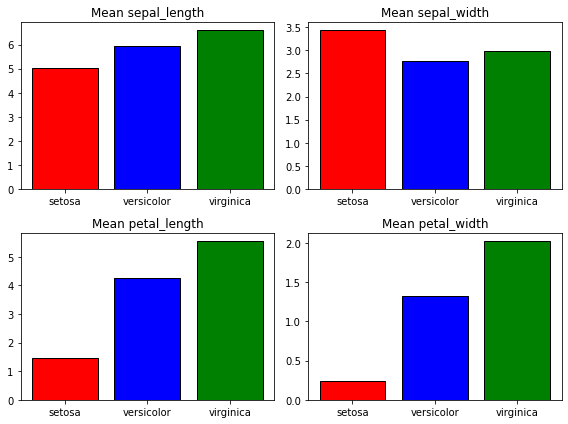

In [6]:
iris_colors =['red','blue','green']
iris_columns =['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
plt.figure(figsize=[8,6])
for itr in range(0,len(iris_columns)):
    plt.subplot(2,2,itr+1)
    plt.title('Mean '+ iris_columns[itr] +'')
    plt.bar(x=iris_means.index, height=iris_means.loc[:,iris_columns[itr]], color=iris_colors, edgecolor='black')
plt.tight_layout()
plt.show()

# Problem 2: Ames Housing - Neighborhoods

In [7]:
ames.head(8)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
5,6,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500
6,7,527127150,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,213500
7,8,527145080,120,RL,43.0,5005,Pave,NaN,IR1,HLS,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,191500


In [8]:
print(ames.columns.values)

['Order' 'PID' 'MS SubClass' 'MS Zoning' 'Lot Frontage' 'Lot Area'
 'Street' 'Alley' 'Lot Shape' 'Land Contour' 'Utilities' 'Lot Config'
 'Land Slope' 'Neighborhood' 'Condition 1' 'Condition 2' 'Bldg Type'
 'House Style' 'Overall Qual' 'Overall Cond' 'Year Built' 'Year Remod/Add'
 'Roof Style' 'Roof Matl' 'Exterior 1st' 'Exterior 2nd' 'Mas Vnr Type'
 'Mas Vnr Area' 'Exter Qual' 'Exter Cond' 'Foundation' 'Bsmt Qual'
 'Bsmt Cond' 'Bsmt Exposure' 'BsmtFin Type 1' 'BsmtFin SF 1'
 'BsmtFin Type 2' 'BsmtFin SF 2' 'Bsmt Unf SF' 'Total Bsmt SF' 'Heating'
 'Heating QC' 'Central Air' 'Electrical' '1st Flr SF' '2nd Flr SF'
 'Low Qual Fin SF' 'Gr Liv Area' 'Bsmt Full Bath' 'Bsmt Half Bath'
 'Full Bath' 'Half Bath' 'Bedroom AbvGr' 'Kitchen AbvGr' 'Kitchen Qual'
 'TotRms AbvGrd' 'Functional' 'Fireplaces' 'Fireplace Qu' 'Garage Type'
 'Garage Yr Blt' 'Garage Finish' 'Garage Cars' 'Garage Area' 'Garage Qual'
 'Garage Cond' 'Paved Drive' 'Wood Deck SF' 'Open Porch SF'
 'Enclosed Porch' '3Ssn Porch' 'Sc

In [9]:
ames_nbhd = (ames.loc[:,['Neighborhood', 'SalePrice']].groupby("Neighborhood").mean('SalePrice')).sort_values(by=['SalePrice'])
ames_nbhd.head(5)

,SalePrice
Neighborhood,
MeadowV,95756.486486
IDOTRR,103752.903226
BrDale,105608.333333
OldTown,123991.891213
BrkSide,124756.250000


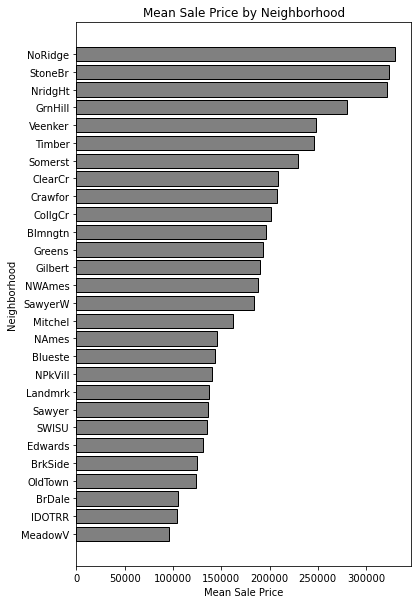

In [10]:
plt.figure(figsize=[6,10])
plt.barh(y=ames_nbhd.index, width=ames_nbhd.loc[:,'SalePrice'], color='grey', edgecolor='black')
plt.xlabel('Mean Sale Price')
plt.ylabel('Neighborhood')
plt.title('Mean Sale Price by Neighborhood')
plt.show()

# Problem 3: Ames Housing – House Styles

In [11]:
ames_style = ames.loc[:,['House Style','SalePrice']].groupby("House Style").count().sort_values(by=['SalePrice'])
ames_style.rename(columns={'SalePrice':'Count'}, inplace=True)
ames_style

,Count
House Style,
2.5Fin,8
1.5Unf,19
2.5Unf,24
SFoyer,83
SLvl,128
1.5Fin,314
2Story,873
1Story,1481


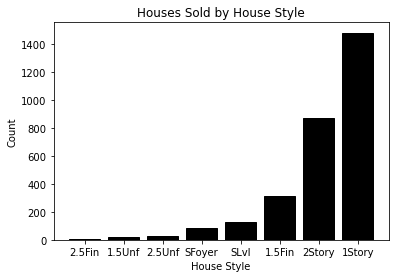

In [12]:
plt.figure(figsize=[6,4])
plt.bar(x=ames_style.index, height=ames_style.loc[:,'Count'], color='black', edgecolor='black')
plt.xlabel('House Style')
plt.ylabel('Count')
plt.title('Houses Sold by House Style')
plt.show()

# Problem 4: Titanic Dataset – Survival Rates 


In [13]:
titanic.head(8)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750


In [14]:
np.mean(titanic.Survived)
print("Proportion of Passengers who survived: ",round(np.mean(titanic.Survived),4))

Proportion of Passengers who survived:  0.3856


In [15]:
surv_rates = titanic.loc[:,['Pclass', 'Sex','Survived']].groupby(['Pclass', 'Sex']).mean()
surv_rates

Survived
Pclass Sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.137026

# Problem 5: Titanic Dataset – Sex Distribution by Class and Outcome

In [16]:
titanic['male'] = (titanic['Sex']=='male')
titanic['female'] = (titanic['Sex']=='female')
titanic['male'] = titanic['male'].astype('int')
titanic['female'] = titanic['female'].astype('int')
titanic.head(8)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,male,female
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,1,0
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,0,1
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,0,1
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,0,1
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,1,0
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583,1,0
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625,1,0
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750,1,0


In [17]:
sex_dist_by_class = titanic.loc[:,['Pclass', 'female','male']].groupby('Pclass').sum()
sex_dist_by_class

,female,male
Pclass,,
1,94,122
2,76,108
3,144,343


In [18]:
sex_dist_by_outcome = titanic.loc[:,['Survived', 'female','male']].groupby('Survived').sum()
sex_dist_by_outcome

,female,male
Survived,,
0,81,464
1,233,109


# Problem 6: Batting Data – Home Runs

In [19]:
batting.head(5)

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,0.0
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,1.0
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,...,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,0.0
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,0.0


In [20]:
 batting.columns.values

array(['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'G', 'AB', 'R',
       'H', '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP',
       'SH', 'SF', 'GIDP'], dtype=object)

In [21]:
total_hr = batting.loc[:,['teamID', 'yearID', 'HR']].groupby(['teamID', 'yearID'],as_index=False).sum().sort_values(by='HR',ascending=[False])
total_hr.head(10)

,teamID,yearID,HR
1840,NYA,2018,267
2384,SEA,1997,264
2722,TEX,2005,260
2771,TOR,2010,257
125,BAL,1996,257
145,BAL,2016,253
1273,HOU,2000,249
2718,TEX,2001,246
1834,NYA,2012,245
2383,SEA,1996,245


In [22]:
avg_hr = batting.loc[:,['teamID', 'HR']].groupby(['teamID']).mean().sort_values(by='HR',ascending=[False])
avg_hr.head(10)

,HR
teamID,
ML1,4.775161
MIL,4.008448
ANA,3.928783
TOR,3.915329
COL,3.912252
BAL,3.843130
TEX,3.686453
ARI,3.668378
NYP,3.666667


# Problem 7: Batting Data – Batting Averages

In [23]:
batting_avg = batting.loc[:,[ 'teamID', 'yearID', 'H','AB']].groupby([ 'teamID', 'yearID']).sum()
batting_avg['BA'] = batting_avg['H']/batting_avg['AB'] 
batting_avg.sort_values(by='BA')
batting_avg.head(10)

H    AB        BA
teamID yearID                      
ALT    1884     223   899  0.248053
ANA    1997    1531  5628  0.272033
       1998    1530  5630  0.271758
       1999    1404  5494  0.255552
       2000    1574  5628  0.279673
       2001    1447  5551  0.260674
       2002    1603  5678  0.282318
       2003    1473  5487  0.268453
       2004    1603  5675  0.282467
ARI    1998    1353  5491  0.246403

# Problem 8: Batting Data – Cardinals vs. Cubs

In [24]:
stl_batting_temp = batting.loc[(batting.teamID == 'SLN') & (batting.yearID >=1900)]
stl_batting = stl_batting_temp.loc[:, ['yearID','H','AB','HR']]
grouped_stl_batting = stl_batting.loc[:,['yearID', 'H', 'AB', 'HR']].groupby("yearID").sum()
grouped_stl_batting['BA'] = grouped_stl_batting.loc[:,'H']/grouped_stl_batting.loc[:,'AB']
stl_batting = grouped_stl_batting 
stl_batting

,H,AB,HR,BA
yearID,,,,
1900,1420,4877,36,0.291163
1901,1430,5039,39,0.283786
1902,1226,4751,10,0.258051
1903,1176,4689,8,0.250800
1904,1292,5104,24,0.253135
...,...,...,...,...
2014,1371,5426,105,0.252672
2015,1386,5484,137,0.252735
2016,1415,5548,225,0.255047


In [25]:
chi_batting_temp = batting.loc[(batting.teamID == 'CHN') & (batting.yearID >=1900)]
chi_batting = chi_batting_temp.loc[:, ['yearID','H','AB','HR']]
grouped_chi_batting = chi_batting.loc[:,['yearID', 'H', 'AB', 'HR']].groupby("yearID").sum()
grouped_chi_batting['BA'] = grouped_chi_batting.loc[:,'H']/grouped_chi_batting.loc[:,'AB']
chi_batting = grouped_chi_batting
chi_batting

,H,AB,HR,BA
yearID,,,,
1900,1276,4907,33,0.260037
1901,1250,4844,18,0.258051
1902,1224,4870,6,0.251335
1903,1300,4733,9,0.274667
1904,1294,5210,22,0.248369
...,...,...,...,...
2014,1315,5508,157,0.238744
2015,1341,5491,171,0.244218
2016,1409,5503,199,0.256042


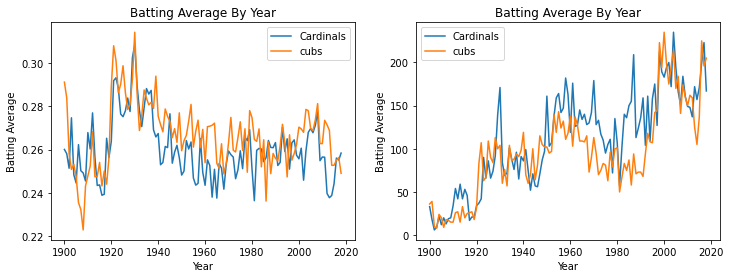

In [26]:
plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
plt.plot(chi_batting.BA,label='Cardinals')
plt.plot(stl_batting.BA,label='cubs')
plt.xlabel('Year')
plt.ylabel('Batting Average')
plt.title('Batting Average By Year')
plt.legend()
plt.subplot(1,2,2)
plt.plot(chi_batting.HR,label='Cardinals')
plt.plot(stl_batting.HR,label='cubs')
plt.xlabel('Year')
plt.ylabel('Batting Average')
plt.title('Batting Average By Year')
plt.legend()
plt.show()